In [12]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
import matplotlib.pyplot as plt
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [13]:
a=pd.read_csv("MNIST.csv")

In [14]:
a.shape

(42000, 785)

In [15]:
a.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

In [16]:
a.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [17]:
# Lets try to do coding in two parts
# Plot this is an image data
# Build Neural Network
print(28*28)

784


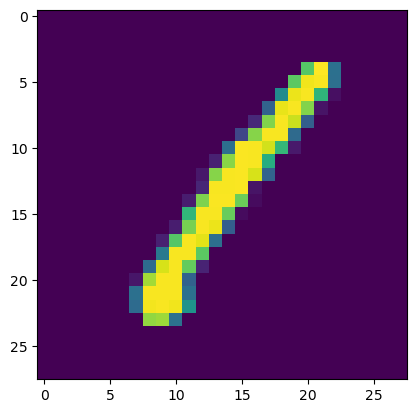

In [18]:
a1=a.iloc[:,1::]
abcd=a1.iloc[0]
abcd=np.array(abcd)
abcd=abcd.reshape(28,28)
plt.imshow(abcd)

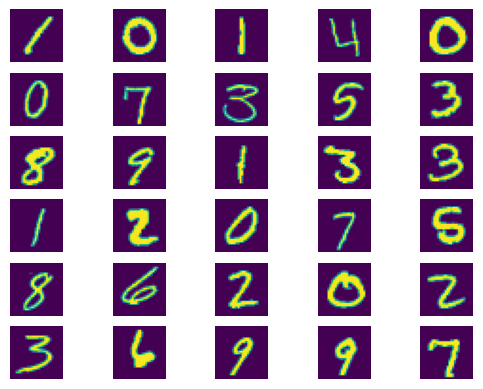

In [19]:
## TO see the images of first 30 records
a1=a.iloc[:,1::]
a1=np.array(a1)
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.imshow(a1[i,:].reshape(28,28))
    plt.axis("off")

In [20]:
# Hence this is image data
a.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
pixel30     0
pixel31     0
pixel32     0
pixel33     0
pixel34     0
pixel35     0
pixel36     0
pixel37     0
pixel38     0
pixel39     0
pixel40     0
pixel41     0
pixel42     0
pixel43     0
pixel44     0
pixel45     0
pixel46     0
pixel47     0
pixel48     0
pixel49     0
pixel50     0
pixel51     0
pixel52     0
pixel53     0
pixel54     0
pixel55     0
pixel56     0
pixel57     0
pixel58     0
pixel59     0
pixel60     0
pixel61     0
pixel62     0
pixel63     0
pixel64     0
pixel65     0
pixel66     0
pixel67     0
pixel68     0
pixel69     0
pixel7

In [21]:
# Sampling 
from sklearn.model_selection import train_test_split
a_train,a_test=train_test_split(a,test_size=0.2)

In [22]:
a_train_x=a_train.iloc[:,1::]
a_train_y=a_train.iloc[:,0]

In [23]:
a_test_x=a_test.iloc[:,1::]
a_test_y=a_test.iloc[:,0]

In [24]:
import tensorflow as tf
# This step is optional but recommended
a_train_x=tf.keras.utils.normalize(a_train_x)   # Input layer(keras) don't need to give it automatically gives x variables you have give neurons
a_test_x=tf.keras.utils.normalize(a_test_x)

In [25]:
a_train_x

<tf.Tensor: shape=(33600, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [26]:
import tensorflow as tf
model=tf.keras.models.Sequential()     #Initialize the model

In [27]:
model.add(tf.keras.layers.Dense(120,activation=tf.nn.relu)) # Dense is layer,1st hiddent layer
model.add(tf.keras.layers.Dense(120,activation=tf.nn.relu)) # Dense is layer,2nd hiddent layer
model.add(tf.keras.layers.Dense(120,activation=tf.nn.relu)) # Dense is layer,3rd hiddent layer
# Output layer neuron is matched to no. of classes to output variable  (Always use softmax af)
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))  # Output Layer and 10 is not an hyperparameter
# Adam type of Gradient Descent
adam=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [28]:
a_train_x=np.array(a_train_x)
a_train_y=np.array(a_train_y)

In [37]:
history=model.fit(a_train_x,a_train_y,epochs=12,batch_size=128,validation_split=0.2)  #Power of 2 ,0.2 is cross validation

Epoch 1/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9674 - val_loss: 0.1146
Epoch 2/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9936 - loss: 0.0258 - val_accuracy: 0.9682 - val_loss: 0.1204
Epoch 3/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9940 - loss: 0.0196 - val_accuracy: 0.9661 - val_loss: 0.1199
Epoch 4/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9949 - loss: 0.0182 - val_accuracy: 0.9671 - val_loss: 0.1294
Epoch 5/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9965 - loss: 0.0147 - val_accuracy: 0.9631 - val_loss: 0.1453
Epoch 6/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9948 - loss: 0.0160 - val_accuracy: 0.9682 - val_loss: 0.1288
Epoch 7/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9972 - loss: 0.0101 - val_accuracy: 0.9674 - val_loss: 0.1413
Epoch 8/12
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9966 - loss: 0.0119 - val_accurac

In [30]:
pred=model.predict(a_test_x)  ## Probability Values

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
pre=np.argmax(pred,axis=1)

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(a_test_y,pre)

array([[829,   0,   1,   1,   1,   0,   1,   0,   4,   1],
       [  0, 937,   3,   3,   2,   0,   0,   5,   8,   3],
       [  9,   3, 765,   4,   2,   0,   2,  10,   9,   2],
       [  3,   0,  10, 811,   1,   8,   1,   3,  36,   8],
       [  0,   0,   1,   0, 754,   0,   7,   2,   1,  26],
       [  2,   0,   1,  15,   3, 711,   4,   0,   8,   9],
       [  4,   0,   1,   0,   4,   2, 874,   0,   5,   0],
       [  2,   4,   5,   3,   2,   0,   1, 826,   3,  23],
       [  1,   0,   1,   3,   1,   2,   4,   0, 729,   4],
       [  1,   0,   0,   3,  12,   2,   0,   2,   9, 837]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(a_test_y,pre)*100

96.10714285714286